In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np

In [53]:
plt.style.use('fivethirtyeight')

## Load The Data

Here I am using the **Diet Dataset** (see [here](https://www.sheffield.ac.uk/mash/statistics2/anova) for more datasets) from University of Sheffield for this practice problem. From the description [here](https://bioinformatics-core-shared-training.github.io/linear-models-r/r-recap.nb.html), the gender is binary variable which contains 0 for Female and 1 for Male. For this toy problem purpose, I have a hypothesis that Female and Male Height's mean is same.

In [2]:
data = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv')

## Getting Sense of The Dataset

In [3]:
data.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [48]:
print('This dataset contains {} rows'.format(data.size))

This dataset contains 546 rows


## See If There is Any Missing Values

In [27]:
data.gender.unique()

array([' ', '0', '1'], dtype=object)

In [28]:
# show which person have missing value in gender
data[data.gender == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0


In [32]:
print('Missing value percentage of all data: {:.2f}%'.format(data[data.gender == ' '].size / data.size * 100))

Missing value percentage of all data: 2.56%


Cool! we only have ~3% missing value, either we could ignore, delete, or classify it's gender by using the closest Height mean.

## Getting the Sense of the Height Distribution

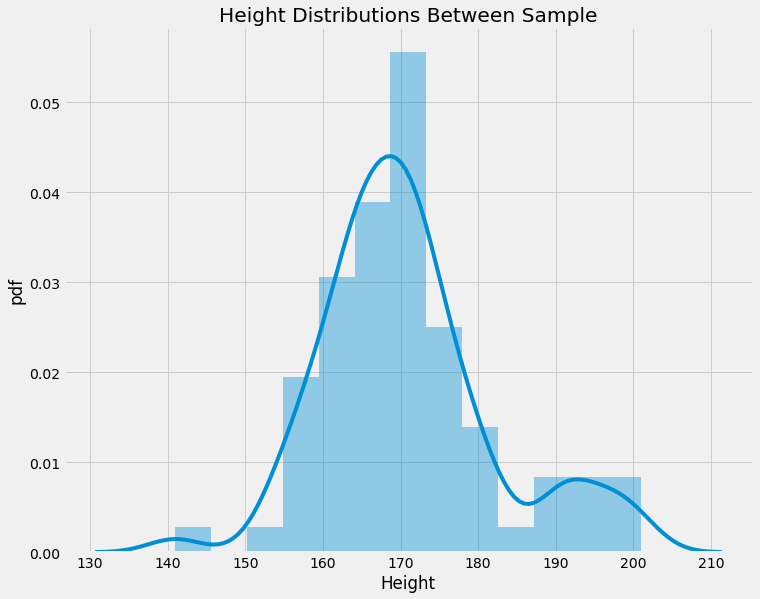

In [54]:
f, ax = plt.subplots(figsize=(11,9))
plt.title('Height Distributions Between Sample')
plt.ylabel('pdf')
sns.distplot(data.Height)

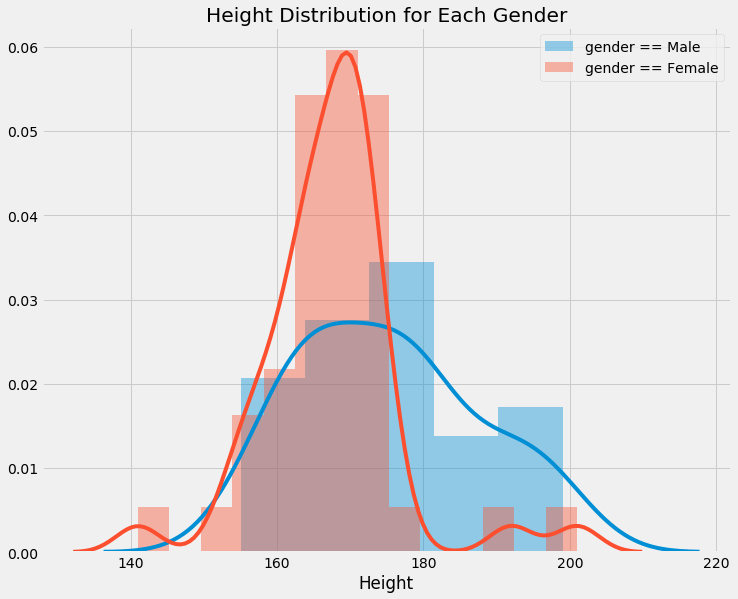

In [55]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(data[data.gender == '1'].Height, ax=ax, label='gender == Male')
sns.distplot(data[data.gender == '0'].Height, ax=ax, label='gender == Female')
plt.title('Height Distribution for Each Gender')
plt.legend()

In [50]:
data.groupby('gender').agg([np.mean, np.median, np.count_nonzero, np.std]).Height

,mean,median,count_nonzero,std
gender,,,,
,172.500000,172.5,2,2.121320
0,167.348837,169.0,43,9.456375
1,175.242424,175.0,33,12.326370


Although the Height Distribution for Each Gender shows that most of the Females have both mean and median below Males, it is also not clear that are all **males have a tendency to be taller than females? **

## The 1 Way Anova

The 1 way anova's null hypothesis is
$$\mu_{gender_1} = \mu_{gender_2}$$

and this tests tries to see if it is true or not true

let's assume that we have initially determine our confidence level of 99%, which means that we will accept 1% error rate.

In [18]:
mod = ols('Height ~ gender', data=data).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F    PR(>F)
gender    1169.159132   2.0  5.084876  0.008494
Residual  8622.328048  75.0       NaN       NaN


Since the p-value $PR(>F)$ is less than our error rate (0.01 > 0.0085), we could reject the null hypothesis. This means we are quite confident that **there is a different in height for each gender**

# References:
- https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
- http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html
- http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html
- https://www.sheffield.ac.uk/mash/statistics2/anova
